In [ ]:
#################### OUTLIER REMOVAL AND AVERAGING ######################
# plt.boxplot(y)
# plt.show()

# skc = 1
# att = sorted(sorted([(y[i],i) for i in range(len(y))], reverse=True)[skc:-skc], key=lambda x: x[1])
# y_cleaned = [x[0] for x in att]

# plt.plot(normalized_tone[:5000])
# new_tone = []
# sz = 2
# avg = 0
# for i in range(sz):
#     avg += y[i]
# avg /= sz
# new_tone.append(avg)
# for j in range(sz, len(y)):
#     avg += y[j]/sz - y[j-sz]/sz
#     new_tone.append(avg)
#################### OUTLIER REMOVAL AND AVERAGING ######################

#################### MIXED SIGNAL ######################
# import numpy as np
# from matplotlib import pyplot as plt
# from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
# SAMPLE_RATE = 44100  # Hertz
# write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

# DURATION = 5  # Seconds

# def generate_sine_wave(freq, sample_rate, duration):
#     x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
#     frequencies = x * freq
#     # 2pi because np.sin takes radians
#     y = np.sin((2 * np.pi) * frequencies)
#     return x, y

# _, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
# _, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
# noise_tone = noise_tone * 0.3

# mixed_tone = nice_tone + noise_tone
# normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)
#################### MIXED SIGNAL ######################


#################### FFT ######################
# from scipy.fft import fft, fftfreq

# # Number of samples in normalized_tone
# N = SAMPLE_RATE * DURATION

# yf = fft(normalized_tone)
# xf = fftfreq(N, 1 / SAMPLE_RATE)

# print(xf, yf)

# plt.scatter(xf, np.abs(yf))
# plt.show()
#################### FFT ######################

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.fft import fft, fftfreq, irfft
import pandas as pd
import os
import soundfile as sf

/var/folders/6z/jjlz4p310njg03mqb58lz74h0000gq/T/ipykernel_20705/3722060315.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


/var/folders/6z/jjlz4p310njg03mqb58lz74h0000gq/T/ipykernel_20705/1221163061.py:48: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filePath)
/Users/personal/Library/Python/3.9/lib/python/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


[ 9.8919947e-05 -1.1142499e-04  1.1670200e-04 ... -4.6216913e-02
 -6.3276887e-02 -3.3947963e-02]
22050
670518


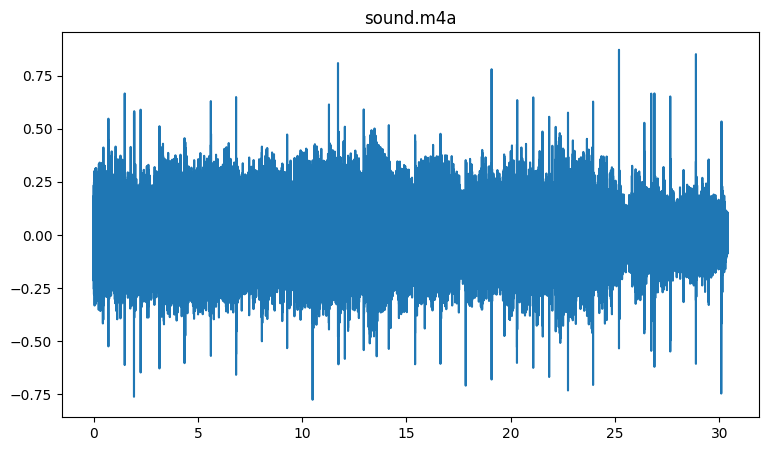

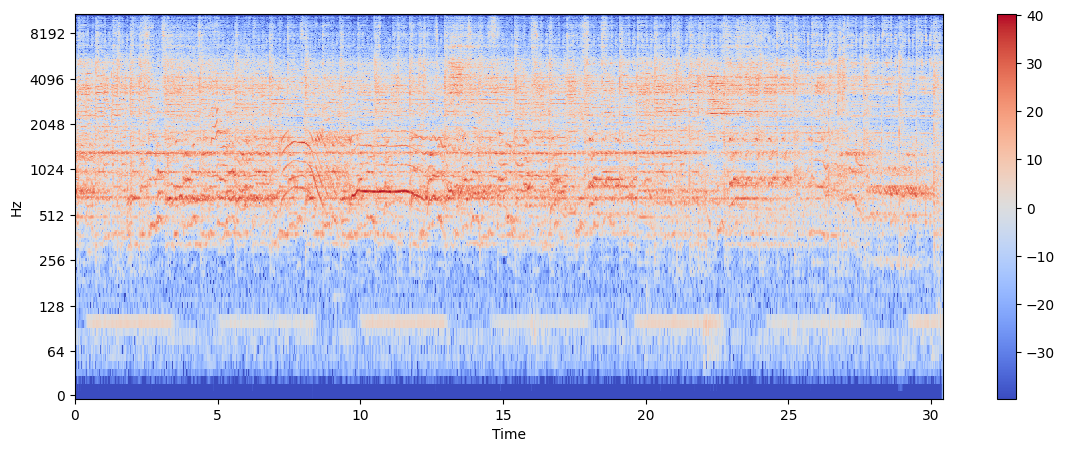

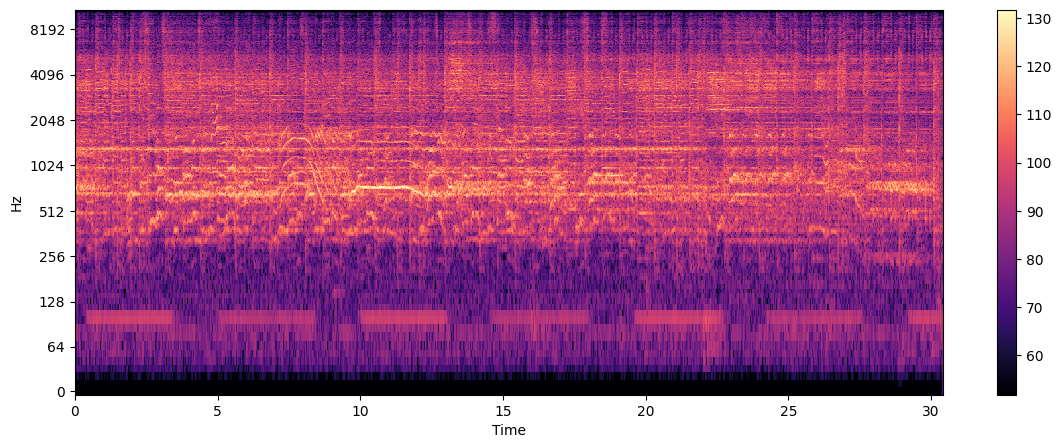

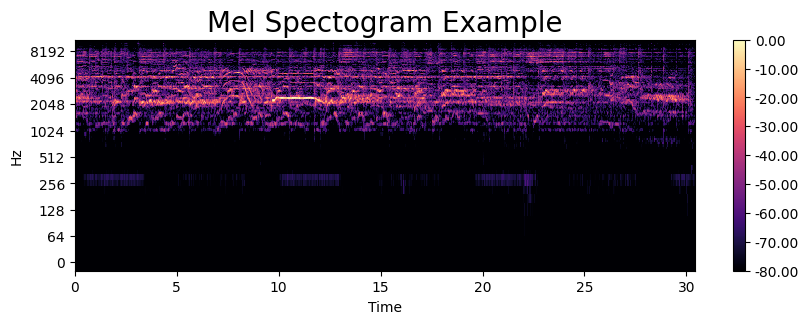

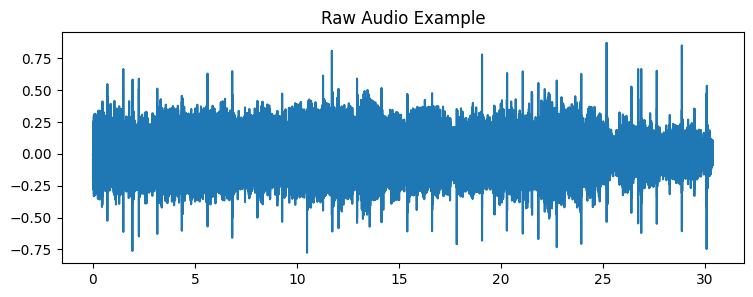

(20, 1310)


/var/folders/6z/jjlz4p310njg03mqb58lz74h0000gq/T/ipykernel_20705/1221163061.py:48: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filePath)
/Users/personal/Library/Python/3.9/lib/python/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


[-2.45995965e-04 -3.16941791e-04  3.67843495e-05 ... -1.21678814e-01
 -1.17252603e-01 -1.08504094e-01]
22050
664205


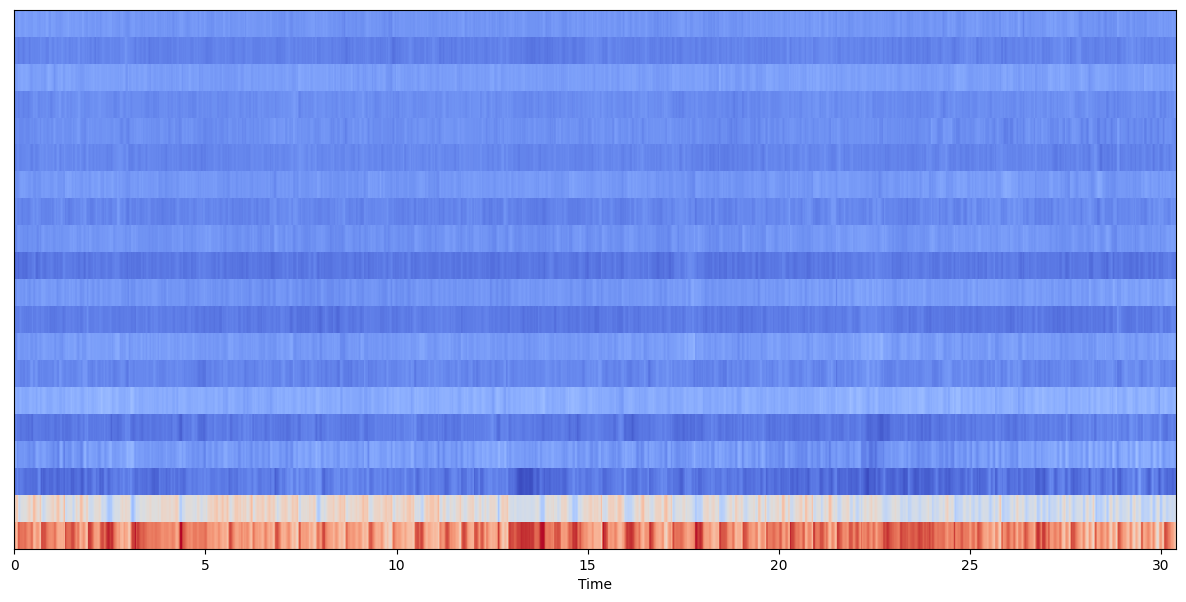

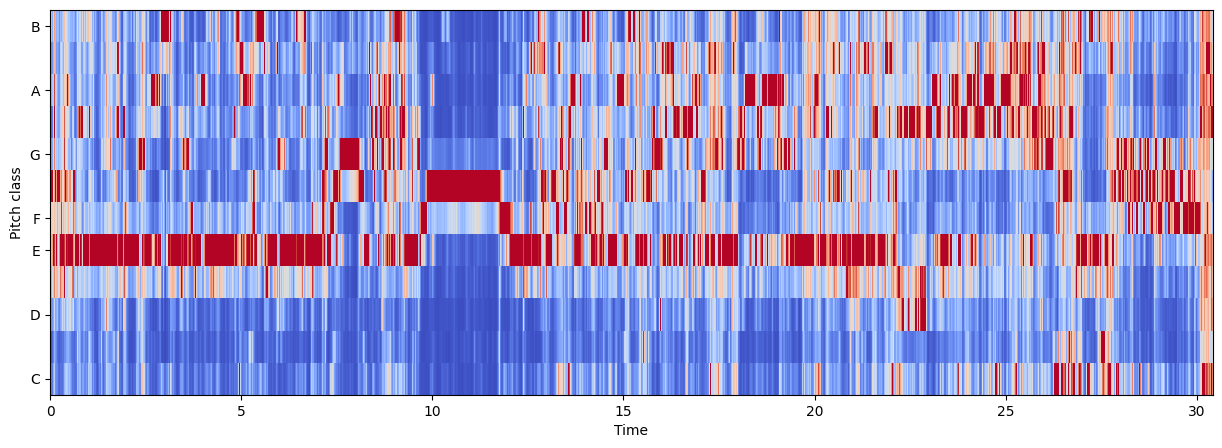

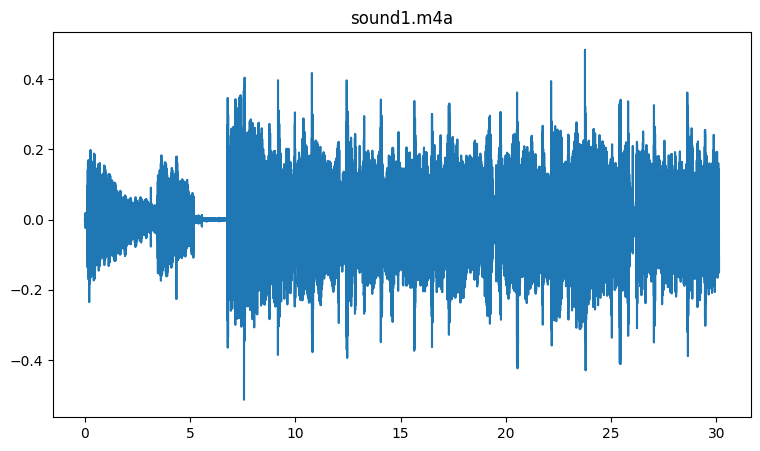

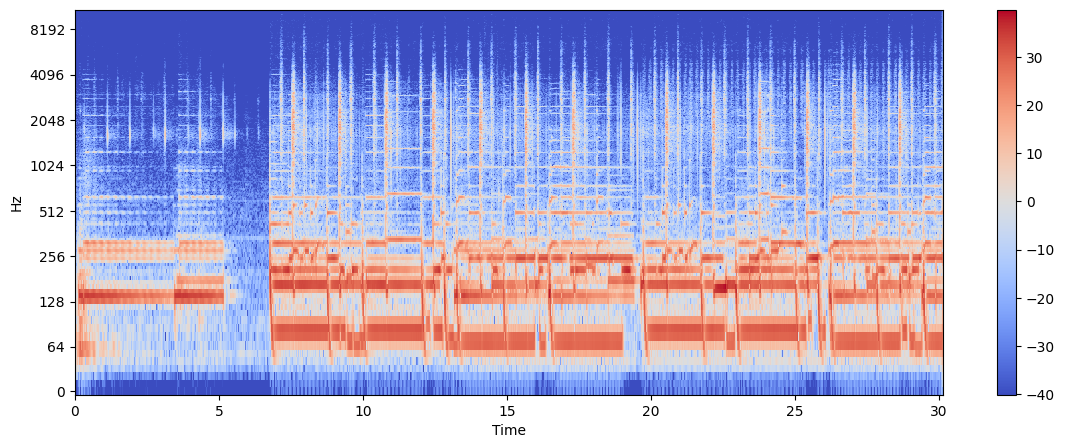

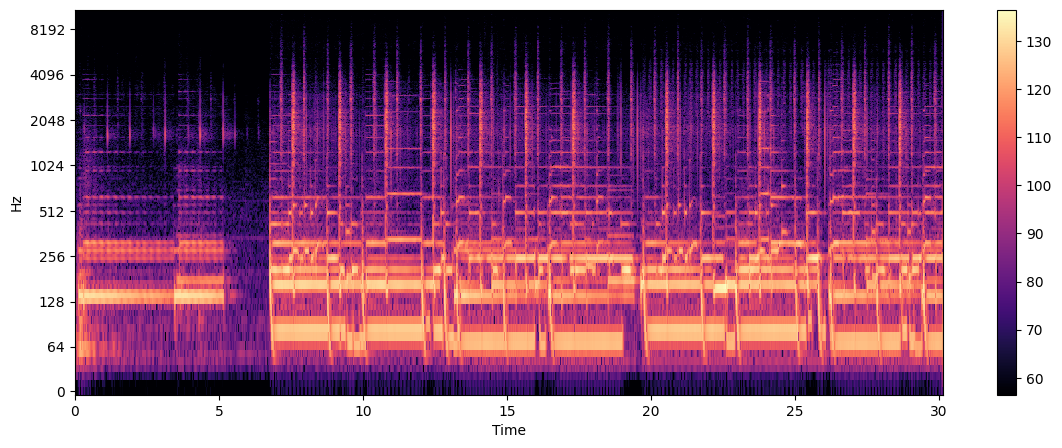

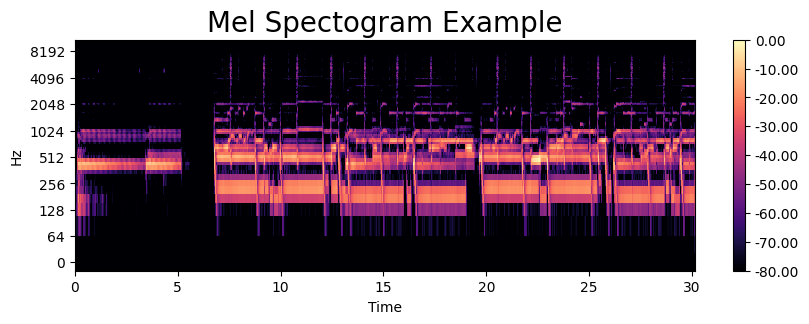

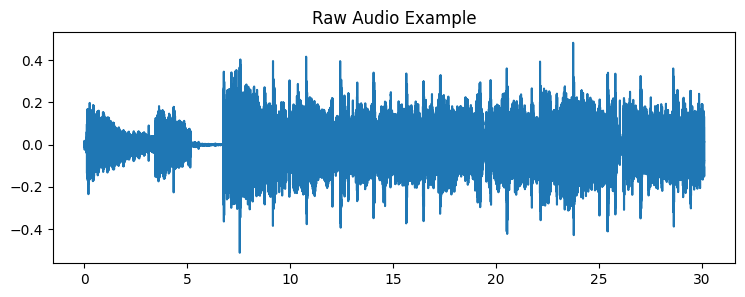

(20, 1298)


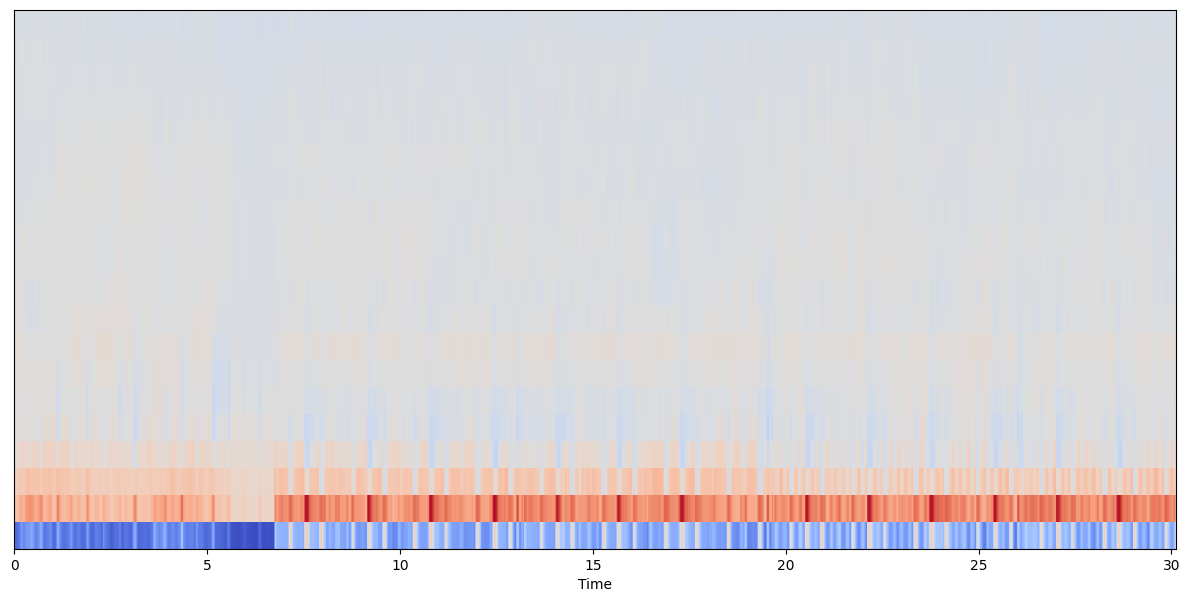

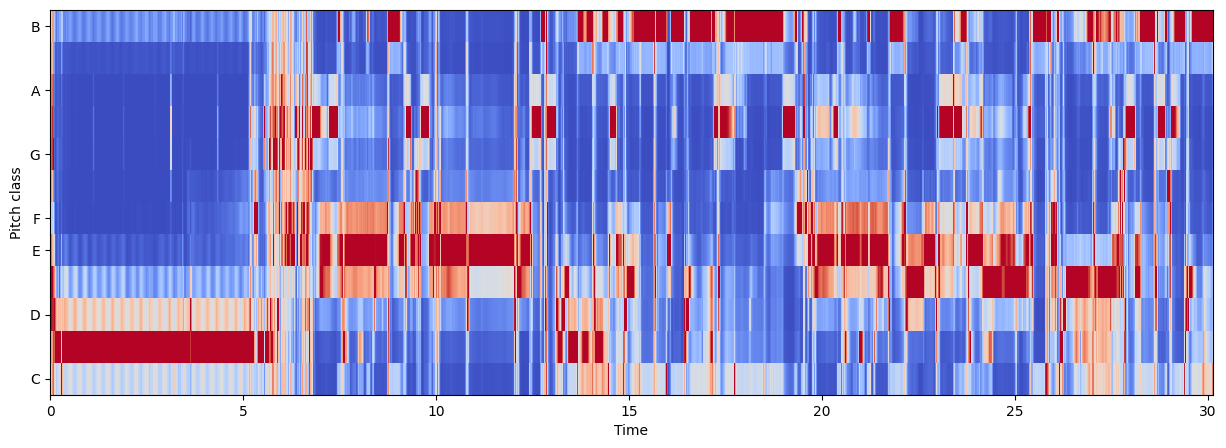

In [3]:
def generate_graphs(y, sr):
    X = librosa.stft(y)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

    X = librosa.stft(y/y.max() * 32767.00)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

    S = librosa.feature.melspectrogram(y=y,
                                    sr=sr,
                                    n_mels=128 * 2,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

    fig, ax = plt.subplots(figsize=(10, 3))
    # Plot the mel spectogram
    img = librosa.display.specshow(S_db_mel,
                                x_axis='time',
                                y_axis='log',
                                ax=ax)
    ax.set_title('Mel Spectogram Example', fontsize=20)
    fig.colorbar(img, ax=ax, format=f'%0.2f')
    plt.show()

    plt.figure(figsize=(8.8, 3))
    plt.plot([(i+1)/sr for i in range(len(y))], y)
    plt.title('Raw Audio Example')
    plt.show()

    fs=10
    mfccs = librosa.feature.mfcc(y=y, sr=fs)
    print(mfccs.shape)
    (20, 97)
    #Displaying  the MFCCs:
    plt.figure(figsize=(15, 7))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')

    hop_length=12
    chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

def analyzeSignal(filePath, fileName):
    y, sr = librosa.load(filePath)

    print(y)
    # y = y[int(sr*0.52):int(sr*1.87)]
    # sf.write('chimes.ogg', y, sr)
    
    print(sr)
    print(len(y))

    aud = ipd.Audio(y, rate=sr)

    plt.figure(figsize=(9, 5))
    plt.plot([(i+1)/sr for i in range(len(y))], y)
    plt.title(fileName)
    plt.show()

    # Y,X = fft(y/y.max() * 32767.00),fftfreq(len(y), 1/sr)
    # plt.plot(X, Y)
    # plt.show()

    # new_sig = irfft(yf)

    generate_graphs(y, sr)
    aud
    return aud

dir_name = 'RecordedSounds/'
# file = os.listdir(dir_name)[0]
for file in os.listdir(dir_name):
    aud = analyzeSignal(dir_name + file, file)
# aud = analyzeSignal(dir_name + file, file)
# aud